# Two-Samples Independent T-Test

In [1116]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import statistics as st
import pylab
import sklearn as sk
import matplotlib as mpl
import statsmodels.stats.weightstats as wstats
from scipy.stats import sem
from math import sqrt 
from scipy.stats import norm
from sklearn import preprocessing
from statsmodels.stats.weightstats import ztest

## The Story

In [1117]:
print("In the population, we'd expect Days to have a mean of 23 and standard deviation of 5, but you want to know if your sample comes from a different population.")

In the population, we'd expect Days to have a mean of 23 and standard deviation of 5, but you want to know if your sample comes from a different population.


### Question

In [1118]:
print("Does our sample come from a population with a mean equal to 23, assuming a population standard deviation of 5?")

Does our sample come from a population with a mean equal to 23, assuming a population standard deviation of 5?


### Answer

In [1119]:
dt = pd.read_csv('z_test.csv',dtype=int)

#### Descriptive Statistics

In [1120]:
n=len(dt)
sum=dt.sum()

mlst=np.arange(0, 5, 1)
dt2=dt**2 #2nd Moment of X
sum2=dt2.sum()
dt3=dt**3 #3rd Moment of X
sum3=dt3.sum()
dt4=dt**4 #4th Moment of X
sum4=dt4.sum()

mean=dt.mean()
median=dt.median()
mode=dt.mode()
iqr=dt.quantile(0.75)-dt.quantile(0.25)
max=dt.max()
min=dt.min()
range=max-min
var=round(dt.var(),2)
sd=round(dt.std(),2)

print("Central Tendency Calculations \n===============================\n===============================")

print("n:",n)
print("Sum:",sum[0],"\n===============================")
print(mlst[2],"nd - Moment Sum:",sum2[0])
print(mlst[3],"rd - Moment: Sum",sum3[0])
print(mlst[4],"th - Moment: Sum",sum4[0],"\n===============================")


print("Mean:",mean[0])
print("Median:",median[0],"\n===============================")
print("Mode:\n==============================="),mode.to_string()
print("Max:",max[0],)
print("Min:",min[0],)
print("Range:",range[0],"\n===============================")


print("Variance:",var[0])
print("Standard Deviation:",sd[0],"\n===============================")

print("Quantiles:\n",dt.quantile(q=(0.25,0.50,0.75)),"\n===============================")
print("IQR:",iqr[0],"\n===============================")

print("*******************************************************************************************************************************\nNote:\n-----\nThe 2nd Moment Sum is the Σ(x^2),etc...\n*******************************************************************************************************************************")


Central Tendency Calculations 
n: 50
Sum: 1262 
2 nd - Moment Sum: 33136
3 rd - Moment: Sum 900398
4 th - Moment: Sum 25209544 
Mean: 25.24
Median: 25.0 
Mode:
Max: 35
Min: 13
Range: 22 
Variance: 26.19
Standard Deviation: 5.12 
Quantiles:
       Days
0.25  22.0
0.50  25.0
0.75  29.0 
IQR: 7.0 
*******************************************************************************************************************************
Note:
-----
The 2nd Moment Sum is the Σ(x^2),etc...
*******************************************************************************************************************************


In [1121]:
z = np.array(dt['Days'])
z=((np.mean(z)-z)/np.std(z))

zsum=z.sum()
mlst=np.arange(0, 5, 1)
z2=z**2 #2nd Moment of X
zsum2=z2.sum()
z3=z**3 #3rd Moment of X
zsum3=z3.sum()
z4=z**4 #4th Moment of X
zsum4=z4.sum()

zmean=z.mean()
zmedian=round(np.median(z),4)
ziqr=np.quantile(z,q=0.75)-np.quantile(z,q=0.25)
zmax=np.max(z)
zmin=np.min(z)
zrange=max-min
zvar=round(np.var(z),2)
zsd=round(np.std(z),2)

print("Central Tendency Calculations \n===============================\n===============================")

print("n:",n)
print("Sum:",np.round(zsum,2),"\n===============================")
print(mlst[2],"nd - Moment Sum:",np.round(zsum2,2))
print(mlst[3],"rd - Moment: Sum",np.round(zsum3,2))
print(mlst[4],"th - Moment: Sum",np.round(zsum4,2),"\n===============================")


print("Mean:",zmean)
print("Median:",np.round(zmedian,4),"\n===============================")
print("Mode:\n==============================="),mode.to_string()
print("Max:",np.round(zmax,2),)
print("Min:",np.round(zmin,2),)
print("Range:",np.round(zmax-zmin,2),"\n===============================")


print("Variance:",zvar)
print("Standard Deviation:",zsd,"\n===============================")

print("Quantiles:\n",np.quantile(z,q=(0.025,0.05,0.1,0.25,0.50,0.75,0.90,0.95,0.975)),"\n===============================")
print("IQR:",np.round(ziqr,2),"\n===============================")

print("*******************************************************************************************************************************\nNote:\n-----\nThe 2nd Moment Sum is the Σ(z^2),etc...\n*******************************************************************************************************************************")


Central Tendency Calculations 
n: 50
Sum: -0.0 
2 nd - Moment Sum: 50.0
3 rd - Moment: Sum 5.59
4 th - Moment: Sum 130.96 
Mean: -3.11972669919669e-16
Median: 0.0474 
Mode:
Max: 2.42
Min: -1.93
Range: 4.34 
Variance: 1.0
Standard Deviation: 1.0 
Quantiles:
 [-1.72924079 -1.72924079 -1.33443696 -0.74223121  0.04737646  0.63958221
  1.23178796  1.73516285  1.97698019] 
IQR: 1.38 
*******************************************************************************************************************************
Note:
-----
The 2nd Moment Sum is the Σ(z^2),etc...
*******************************************************************************************************************************


#### Graphs

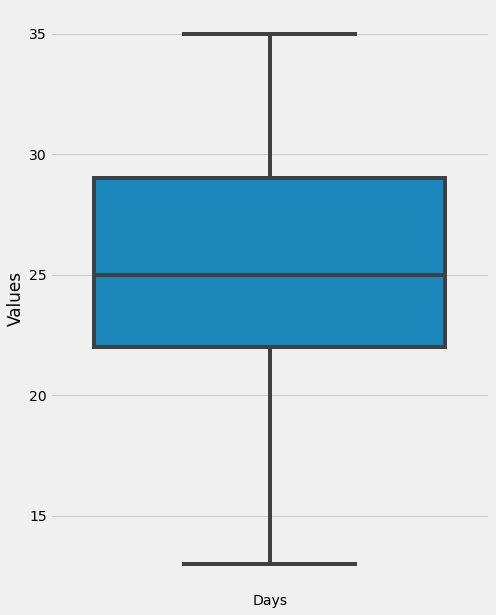

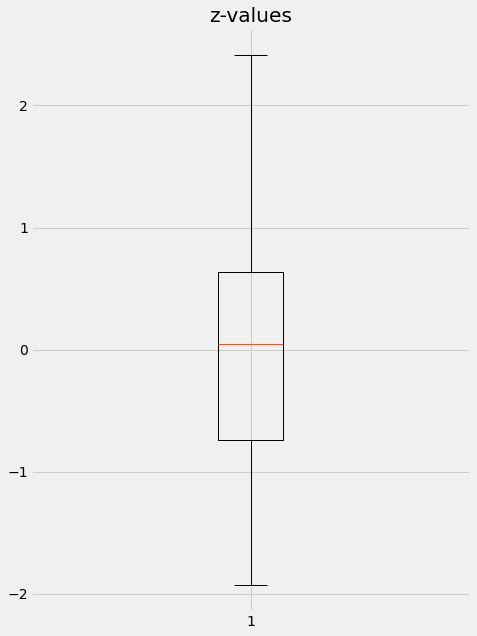

In [1122]:
# Boxplot X
fig, ax = plt.subplots(figsize=(7,10)) #Setting size of the canvas

sns.boxplot(x='variable', y='value', data=pd.melt(dt)).set(
            xlabel='', #define the variable's nature
            ylabel='Values')
# Boxplot Z
fig, ax1 = plt.subplots(figsize=(7,10)) #Setting size of the canvas

ax1.set_title('z-values')
ax1.boxplot(z)
plt.show()

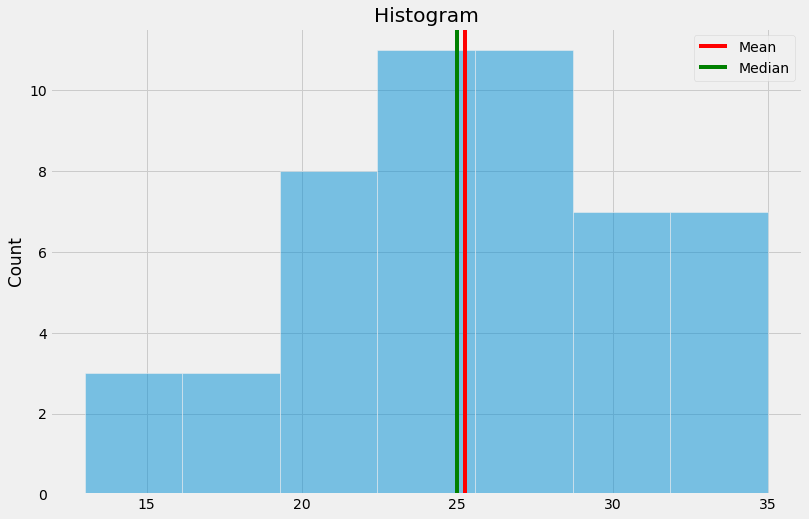

In [1123]:
mean=dt.mean()
median=dt.median()
mode=dt.mode()

fig, ax = plt.subplots(figsize=(12,8)) #Setting size of the canvas
sns.histplot(dt)

plt.title("Histogram")



plt.axvline(x=mean[0], color="red", label="Mean") 
plt.axvline(median[0], color="g", label="Median")
#plt.axvline(mode[0],color="r",label="Mode1")
#plt.axvline(mode[1],color="r",label="Mode2")

plt.legend()
plt.show()

Regression Line: y = f(x) = -0.4824 x + 36.6762


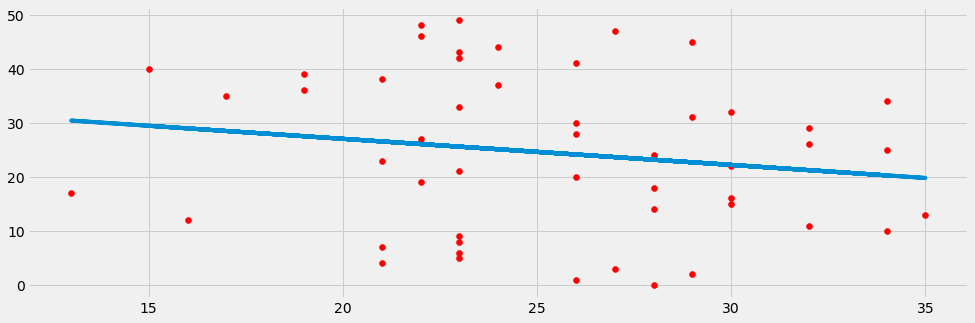

In [1124]:
x=dt['Days']
lst=np.arange(0, lst.max()+1, 1)
fig, ax = plt.subplots(figsize=(15,5)) #Setting size of the canvas

plt.scatter(x, lst, color="r") 
#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(x, lst, 1)
print("Regression Line: y = f(x) =",np.round(m,4),"x +",np.round(b,4))

#add linear regression line to scatterplot 
plt.plot(x, m*x+b)
plt.show()

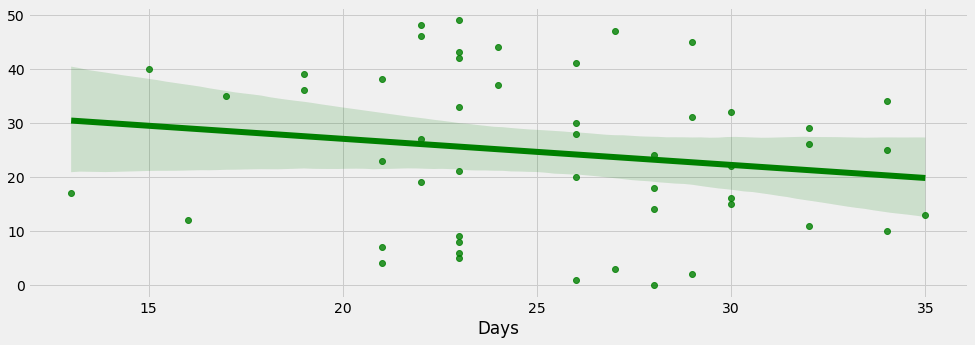

In [1125]:
fig, ax = plt.subplots(figsize=(15,5)) #Setting size of the canvas
ax = sns.regplot(x=x, y=lst, data=x, color="g")

#### Statistical Tests for Normality

In [1126]:
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chisquare
from statsmodels.stats.diagnostic import lilliefors
from scipy.stats import jarque_bera
import statsmodels.api as sm

In [1127]:
print("Statistical Tests for Normality")
print("===============================")
print("Shapiro-Wilk Test")
print("===============================")
data = dt
statistic,pvalue = shapiro(data)
print('Statistic = %.4f'% (statistic))
print('df = %.1i'% (n))
print('p-value = %.4f'% (pvalue))
print("===============================")
print('Result :')
print("===============================")
if pvalue < alpha :
    print("Shapiro-Wilk Test showed that:\nThe data significantly deviate from a normal distribution")
    print("===============================")
else :
    print("Shapiro-Wilk Test showed that:\nThe data is following the Normal distribution with",100*(1-alpha),"% probability")
    print("===============================")

Statistical Tests for Normality
Shapiro-Wilk Test
Statistic = 0.9759
df = 50
p-value = 0.3956
Result :
Shapiro-Wilk Test showed that:
The data is following the Normal distribution with 95.0 % probability


In [1128]:
#Kolmogorov-Smirnov Test
print("Kolmogorov-Smirnov Test")
print("===============================")
data = dt
statistic,pvalue = kstest(data,'norm')
print('Statistic = %.4f'% (statistic))
print('df = %.1i'% (n))
print('p-value = %.4f'% (pvalue))
print("===============================")
print('Result :')
print("===============================")
if pvalue < alpha :
    print("Kolmogorov-Smirnov Test showed that:\nThe data significantly deviate from a normal distribution")
    print("===============================")
else :
    print("Kolmogorov-Smirnov Test showed that:\nThe data is following the Normal distribution with",100*(1-alpha),"% probability")
    print("===============================")

Kolmogorov-Smirnov Test
Statistic = 1.0000
df = 50
p-value = 0.0000
Result :
Kolmogorov-Smirnov Test showed that:
The data significantly deviate from a normal distribution


In [1129]:
#D’Agostino’s K-squared Test
print("D’Agostino’s K-squared Test")
print("===============================")
data = dt
statistic,pvalue = normaltest(data)
print('Statistic = %.4f'% (statistic))
print('df = %.1i'% (n))
print('p-value = %.4f'% (pvalue))
print("===============================")
print('Result :')
print("===============================")
if pvalue < alpha :
    print("D’Agostino’s K-squared Test showed that:\nThe data significantly deviate from a normal distribution")
    print("===============================")
else :
    print("D’Agostino’s K-squared Test showed that:\nThe data is following the Normal distribution with",100*(1-alpha),"% probability")
    print("===============================")

D’Agostino’s K-squared Test
Statistic = 0.2252
df = 50
p-value = 0.8935
Result :
D’Agostino’s K-squared Test showed that:
The data is following the Normal distribution with 95.0 % probability


In [1130]:
#Chi-Square Test
print("Chi-Square Test")
print("===============================")
data = dt
statistic,pvalue = chisquare(data)
print('Statistic = %.4f'% (statistic))
print('df = %.1i'% (n))
print('p-value = %.4f'% (pvalue))
print("===============================")
print('Result :')
print("===============================")
if pvalue < alpha :
    print("Chi-Square Test showed that:\nThe data significantly deviate from a normal distribution")
    print("===============================")
else :
    print("Chi-Square Test showed that:\nThe data is following the Normal distribution with",100*(1-alpha),"% probability")
    print("===============================")

Chi-Square Test
Statistic = 50.8368
df = 50
p-value = 0.4011
Result :
Chi-Square Test showed that:
The data is following the Normal distribution with 95.0 % probability


In [1131]:
#Lilliefors Test
print("Lilliefors Test")
print("===============================")
data = dt
statistic,pvalue = lilliefors(data)
print('Statistic = %.4f'% (statistic))
print('df = %.1i'% (n))
print('p-value = %.4f'% (pvalue))
print("===============================")
print('Result :')
print("===============================")
if pvalue < alpha :
    print("Lilliefors Test showed that:\nThe data significantly deviate from a normal distribution")
    print("===============================")
else :
    print("Lilliefors Test showed that:\nThe data is following the Normal distribution with",100*(1-alpha),"% probability")
    print("===============================")

Lilliefors Test
Statistic = 0.1292
df = 50
p-value = 0.0372
Result :
Lilliefors Test showed that:
The data significantly deviate from a normal distribution


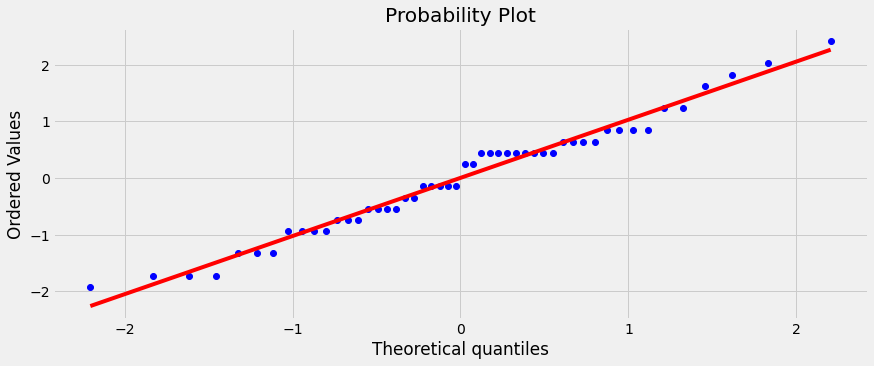

In [1132]:
fig, ax = plt.subplots(figsize=(13,5)) #Setting size of the canvas

stats.probplot(z, dist="norm", plot= pylab)
pylab.show()

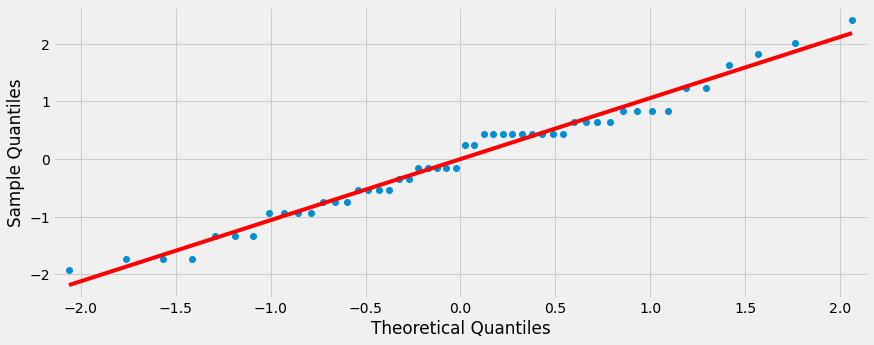

In [1133]:
from statsmodels.graphics.gofplots import qqplot_2samples
mpl.rc("figure", figsize=(13,5))

sm.qqplot(z, line='r')
pylab.show()

### Testing Hypothesis

In [1134]:
mu=23
sigma=5
print("Test Hypothesis")
print('===============================')
print("H0: μ = 23\nH1: μ ≠ 23")
print('===============================')
print("Sum of X =",sum[0])
print("Mean of X =",mean[0])
print("Population Mean (Given) = ",mu)
print("Population Standard Deviation (Given) =", sigma)

zobs=wstats.ztest(dt, value=mu)
obzstat=np.round(zobs[0],4)
pv=np.round(zobs[1],4)
print('===============================')
print("Population Standard Error (using σ) =",np.round(sigma/sqrt(n),4))
print("Critical z-statistic = ±",np.round(norm.ppf(1-(alpha/2)),2))
print("Observed z-statistic =", obzstat)
print('===============================')

LB=np.round(mean[0]-(norm.ppf(1-(alpha/2)*(sigma/sqrt(n)))),2)
UB=np.round(mean[0]+(norm.ppf(1-(alpha/2)*(sigma/sqrt(n)))),2)
print("p-value =",np.round(zobs[1],4))
print('===============================')
print("Lower Bound = ",np.round(mean[0]-(norm.ppf(1-(alpha/2)*(sigma/sqrt(n)))),2))
print("Upper Bound = ",np.round(mean[0]+(norm.ppf(1-(alpha/2)*(sigma/sqrt(n)))),2))
print('===============================')
print()



Test Hypothesis
H0: μ = 23
H1: μ ≠ 23
Sum of X = 1262
Mean of X = 25.24
Population Mean (Given) =  23
Population Standard Deviation (Given) = 5
Population Standard Error (using σ) = 0.7071
Critical z-statistic = ± 1.96
Observed z-statistic = [3.0953]
p-value = [0.002]
Lower Bound =  23.14
Upper Bound =  27.34



#### Results

In [1135]:
print("-----------------------------------------")
print(": Results :")
if(pv < alpha ):
    print("-----------------------------------------")
    print()
    print("Reject the null hypothesis")
    print("Accept the alternative.") 
    print("The difference is statistically significant.") 
    print("The sample is not drawn from a population with a mean of",mu)
    print("If we assume this sample to represent the population, we would expect",100*(1-alpha),"% of sample means to fall between:\n")    
    print("[",LB,",",UB,"]\n")
    print("The difference between the sample mean and population mean was small.")
    print()  
    print("-----------------------------------------")
    print("p-Value =",pv, "<" , alpha , "= α")
    print("-----------------------------------------")
else:
    print("-----------------------------------------")
    print("Reject the null hypothesis")
    print("Remain the null.") 
    print("The difference is statistically NOT significant.") 
    
    print("-----------------------------------------")
    print("p-Value =",pv, ">" , alpha , "= α")
    print("-----------------------------------------")

-----------------------------------------
: Results :
-----------------------------------------

Reject the null hypothesis
Accept the alternative.
The difference is statistically significant.
The sample is not drawn from a population with a mean of 23
If we assume this sample to represent the population, we would expect 95.0 % of sample means to fall between:

[ 23.14 , 27.34 ]

The difference between the sample mean and population mean was small.

-----------------------------------------
p-Value = [0.002] < 0.05 = α
-----------------------------------------
